# Car Price Prediction Using Linear regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cars=pd.read_csv(r'C:\Users\Dell\OneDrive\Desktop\quikr_car.csv')

In [3]:
cars['fuel_type']=cars['fuel_type'].replace('LPG','CNG')

In [4]:
cars.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [5]:
cars.shape

(892, 6)

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [7]:
cars.name.unique()

array(['Hyundai Santro Xing XO eRLX Euro III', 'Mahindra Jeep CL550 MDI',
       'Maruti Suzuki Alto 800 Vxi',
       'Hyundai Grand i10 Magna 1.2 Kappa VTVT',
       'Ford EcoSport Titanium 1.5L TDCi', 'Ford Figo', 'Hyundai Eon',
       'Ford EcoSport Ambiente 1.5L TDCi',
       'Maruti Suzuki Alto K10 VXi AMT', 'Skoda Fabia Classic 1.2 MPI',
       'Maruti Suzuki Stingray VXi', 'Hyundai Elite i20 Magna 1.2',
       'Mahindra Scorpio SLE BS IV', 'Audi A8', 'Audi Q7',
       'Mahindra Scorpio S10', 'Maruti Suzuki Alto 800',
       'Hyundai i20 Sportz 1.2', 'Maruti Suzuki Alto 800 Lx',
       'Maruti Suzuki Vitara Brezza ZDi', 'Maruti Suzuki Alto LX',
       'Mahindra Bolero DI', 'Maruti Suzuki Swift Dzire ZDi',
       'Mahindra Scorpio S10 4WD', 'Maruti Suzuki Swift Vdi BSIII',
       'Maruti Suzuki Wagon R VXi BS III',
       'Maruti Suzuki Wagon R VXi Minor',
       'Toyota Innova 2.0 G 8 STR BS IV', 'Renault Lodgy 85 PS RXL',
       'Skoda Yeti Ambition 2.0 TDI CR 4x2',
       'Maru

In [8]:
cars.year.unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [9]:
cars.Price.unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [10]:
cars.kms_driven.unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

# Problems in  dataset

### - Years : It has unwanted values and is in object dtype
### - Price : It has Ask For Price and is in object
### -Kms_driven : remove the 'kms' and change to int


# Data Cleaning

In [11]:
cars.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [12]:
cars=cars[cars['year'].str.isnumeric()] ## kept all the numeric values


In [13]:
cars['year']=cars['year'].astype(int) ## changing to integer type

In [14]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int32 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 42.8+ KB


In [15]:
cars.year.unique()

array([2007, 2006, 2018, 2014, 2015, 2012, 2013, 2016, 2010, 2017, 2008,
       2011, 2019, 2009, 2005, 2000, 2003, 2004, 1995, 2002, 2001])

In [16]:
#removing the Ask for price value from price column 

cars=cars[cars['Price']!='Ask For Price']

In [17]:
# removing the commas from the price 
cars['Price']=cars['Price'].str.replace(',','')

In [18]:
cars['Price']=cars['Price'].astype(int)

In [19]:
cars.Price.unique()

array([  80000,  425000,  325000,  575000,  175000,  190000,  830000,
        250000,  182000,  315000,  415000,  320000, 1000000,  500000,
        350000,  160000,  310000,   75000,  100000,  290000,   95000,
        180000,  385000,  105000,  650000,  689999,  448000,  549000,
        501000,  489999,  280000,  349999,  284999,  345000,  499999,
        235000,  249999, 1475000,  395000,  220000,  170000,   85000,
        200000,  570000,  110000,  448999, 1891111,  159500,  344999,
        449999,  865000,  699000,  375000,  224999, 1200000,  195000,
        351000,  240000,   90000,  155000,  600000,  189500,  210000,
        390000,  135000, 1600000,  701000,  265000,  525000,  372000,
        635000,  550000,  485000,  329500,  251111,  569999,   69999,
        299999,  399999,  450000,  270000,  158400,  179000,  125000,
        299000,  150000,  275000,  285000,  340000,   70000,  289999,
        849999,  749999,  274999,  984999,  599999,  244999,  474999,
        245000,  169

In [20]:
# removing the word 'kms'.
cars['kms']=cars.kms_driven.apply(lambda x : x.split(' ')[0])

In [21]:
# removin commas from kms
cars['kms']=cars['kms'].str.replace(',','')

In [22]:
cars.head()

,name,company,year,Price,kms_driven,fuel_type,kms
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,"45,000 kms",Petrol,45000
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40 kms,Diesel,40
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,"28,000 kms",Petrol,28000
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,"36,000 kms",Diesel,36000
6,Ford Figo,Ford,2012,175000,"41,000 kms",Diesel,41000


In [23]:
cars.kms.info()

<class 'pandas.core.series.Series'>
Int64Index: 819 entries, 0 to 891
Series name: kms
Non-Null Count  Dtype 
--------------  ----- 
819 non-null    object
dtypes: object(1)
memory usage: 12.8+ KB


In [24]:
cars.drop('kms_driven',axis=1,inplace=True)

In [25]:
cars.head()

,name,company,year,Price,fuel_type,kms
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,Petrol,45000
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,Diesel,40
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,Petrol,28000
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,Diesel,36000
6,Ford Figo,Ford,2012,175000,Diesel,41000


In [26]:
cars=cars[cars['kms'].str.isnumeric()]

In [27]:
cars.kms.head()

0    45000
1       40
3    28000
4    36000
6    41000
Name: kms, dtype: object

In [28]:
cars['kms']=cars['kms'].astype(int)

In [29]:
cars.kms.info()

<class 'pandas.core.series.Series'>
Int64Index: 817 entries, 0 to 889
Series name: kms
Non-Null Count  Dtype
--------------  -----
817 non-null    int32
dtypes: int32(1)
memory usage: 9.6 KB


In [30]:
cars.head()

,name,company,year,Price,fuel_type,kms
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,Petrol,45000
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,Diesel,40
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,Petrol,28000
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,Diesel,36000
6,Ford Figo,Ford,2012,175000,Diesel,41000


In [31]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       817 non-null    object
 1   company    817 non-null    object
 2   year       817 non-null    int32 
 3   Price      817 non-null    int32 
 4   fuel_type  816 non-null    object
 5   kms        817 non-null    int32 
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [32]:
cars.fuel_type.unique()

array(['Petrol', 'Diesel', nan, 'CNG'], dtype=object)

In [33]:
cars=cars[~cars.fuel_type.isnull()].copy()

### checking for missing values

In [34]:
cars.isnull().sum()

name         0
company      0
year         0
Price        0
fuel_type    0
kms          0
dtype: int64

In [35]:
# the car name is very broad and is not much usefull so inly keeping the first three words from the name,they are enough.
cars['name']=cars['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [36]:
cars.head()

,name,company,year,Price,fuel_type,kms
0,Hyundai Santro Xing,Hyundai,2007,80000,Petrol,45000
1,Mahindra Jeep CL550,Mahindra,2006,425000,Diesel,40
3,Hyundai Grand i10,Hyundai,2014,325000,Petrol,28000
4,Ford EcoSport Titanium,Ford,2014,575000,Diesel,36000
6,Ford Figo,Ford,2012,175000,Diesel,41000


In [37]:
cars = cars.reset_index(drop=True)

In [38]:
cars.head()

,name,company,year,Price,fuel_type,kms
0,Hyundai Santro Xing,Hyundai,2007,80000,Petrol,45000
1,Mahindra Jeep CL550,Mahindra,2006,425000,Diesel,40
2,Hyundai Grand i10,Hyundai,2014,325000,Petrol,28000
3,Ford EcoSport Titanium,Ford,2014,575000,Diesel,36000
4,Ford Figo,Ford,2012,175000,Diesel,41000


In [39]:
cars.to_csv('Cleaned_Car_data.csv')

## analysis

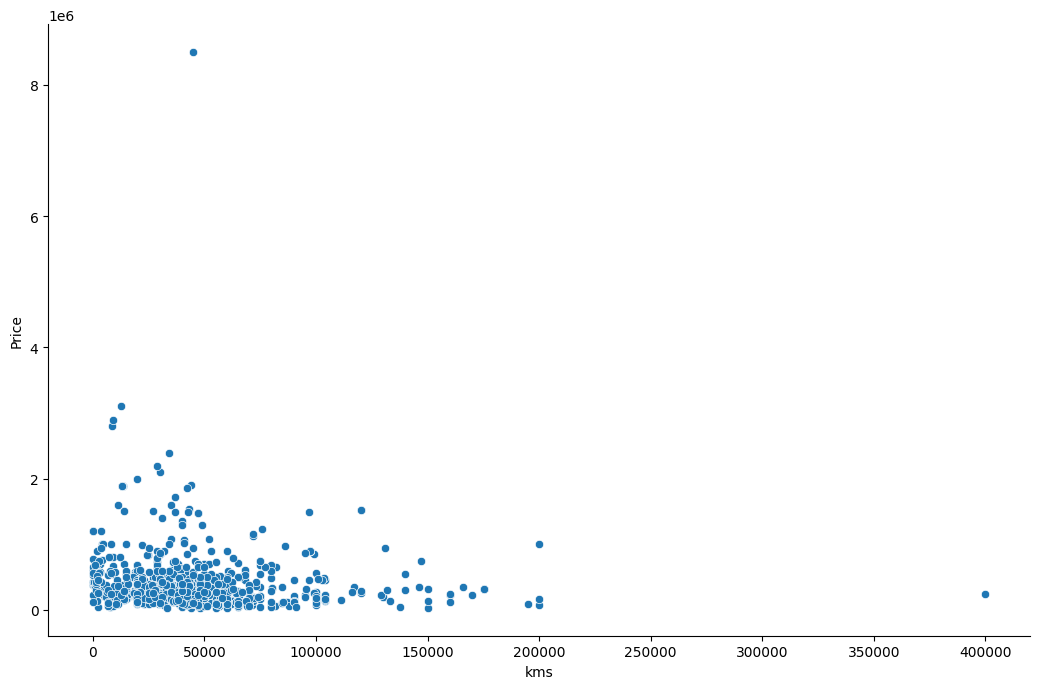

In [40]:
sns.relplot(x='kms',y='Price',data=cars,height=7,aspect=1.5)


# model

In [41]:
cars.describe(include='all')

,name,company,year,Price,fuel_type,kms
count,816,816,816.000000,8.160000e+02,816,816.000000
unique,254,25,NaN,NaN,3,NaN
top,Maruti Suzuki Swift,Maruti,NaN,NaN,Petrol,NaN
freq,51,221,NaN,NaN,428,NaN
mean,NaN,NaN,2012.444853,4.117176e+05,NaN,46275.531863
std,NaN,NaN,4.002992,4.751844e+05,NaN,34297.428044
min,NaN,NaN,1995.000000,3.000000e+04,NaN,0.000000
25%,NaN,NaN,2010.000000,1.750000e+05,NaN,27000.000000
50%,NaN,NaN,2013.000000,2.999990e+05,NaN,41000.000000
75%,NaN,NaN,2015.000000,4.912500e+05,NaN,56818.500000


In [42]:
cars=cars[cars['Price']<6000000]

In [43]:
cars.describe(include='all')

,name,company,year,Price,fuel_type,kms
count,815,815,815.000000,8.150000e+02,815,815.000000
unique,254,25,NaN,NaN,3,NaN
top,Maruti Suzuki Swift,Maruti,NaN,NaN,Petrol,NaN
freq,51,221,NaN,NaN,428,NaN
mean,NaN,NaN,2012.442945,4.017933e+05,NaN,46277.096933
std,NaN,NaN,4.005079,3.815888e+05,NaN,34318.459638
min,NaN,NaN,1995.000000,3.000000e+04,NaN,0.000000
25%,NaN,NaN,2010.000000,1.750000e+05,NaN,27000.000000
50%,NaN,NaN,2013.000000,2.999990e+05,NaN,41000.000000
75%,NaN,NaN,2015.000000,4.900000e+05,NaN,56879.000000


### x and y

In [44]:
X=cars[['name','company','year','fuel_type','kms']]
y=cars['Price']

In [45]:
X

,name,company,year,fuel_type,kms
0,Hyundai Santro Xing,Hyundai,2007,Petrol,45000
1,Mahindra Jeep CL550,Mahindra,2006,Diesel,40
2,Hyundai Grand i10,Hyundai,2014,Petrol,28000
3,Ford EcoSport Titanium,Ford,2014,Diesel,36000
4,Ford Figo,Ford,2012,Diesel,41000
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,Petrol,50000
812,Tata Indica V2,Tata,2009,Diesel,30000
813,Toyota Corolla Altis,Toyota,2009,Petrol,132000
814,Tata Zest XM,Tata,2018,Diesel,27000


In [46]:
y.shape

(815,)

### Applying Train Test Split

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [50]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [51]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [52]:
lr=LinearRegression()


In [53]:
pipe=make_pipeline(column_trans,lr)

In [54]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['CNG', 'Diesel', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [55]:
y_pred=pipe.predict(X_test)

In [56]:
r2_score(y_test,y_pred)

0.6087869679115473

### Finding the model with a random state of TrainTestSplit where the model was found to give a high r2_score

In [57]:

scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [58]:
np.argmax(scores)

302

In [59]:
scores[np.argmax(scores)]

0.8991181549156528

In [60]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,'Petrol',100]).reshape(1,5)))

array([430158.13387123])

### best model at random state of np.argmax score

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8991181549156528

In [62]:
import pickle

In [63]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

### Predict the price

In [64]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2010,'CNG',50000]).reshape(1,5)))

array([150913.24697572])